In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [109]:
name = "615"

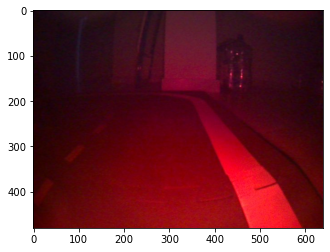

In [110]:
with Image.open("./"+ name + ".png") as im:
    img = np.array(im)
plt.imshow(img)

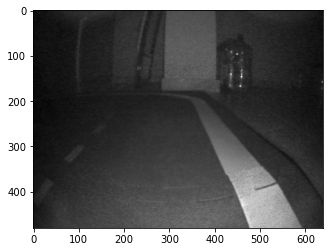

In [111]:
brightness = img[:,:,0]*.257 + img[:,:,1]*.504 + img[:,:,2]*.098 + 16
plt.imshow(brightness, cmap="gray")

In [90]:

new_p = Image.fromarray(brightness)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
    
new_p.save(""+ name +" brightness.png")

In [112]:
def compute_energy(img):
    brightness_matrix = img[:,:,0]*.257 + img[:,:,1]*.504 + img[:,:,2]*.098 + 16
    padded_brightness_matrix = np.pad(brightness_matrix, (1, 1), mode="edge")
    x_derivative = (padded_brightness_matrix[1:-1, 2:] - padded_brightness_matrix[1:-1, :-2]) / 2
    y_derivative = (padded_brightness_matrix[2:, 1:-1] - padded_brightness_matrix[:-2, 1:-1]) / 2
    x_derivative[:, 0] *= 2
    x_derivative[:, -1] *= 2
    y_derivative[0, :] *= 2
    y_derivative[-1, :] *= 2
    return np.sqrt(x_derivative * x_derivative + y_derivative * y_derivative)

In [113]:
def energy_from_article(img):
    brightness_matrix = img[:,:,0]*.257 + img[:,:,1]*.504 + img[:,:,2]*.098 + 16
    padded_brightness_matrix = np.pad(brightness_matrix, (1, 1), mode="edge")
    x_derivative = (padded_brightness_matrix[1:-1, 2:] - padded_brightness_matrix[1:-1, :-2]) / 2
    y_derivative = (padded_brightness_matrix[2:, 1:-1] - padded_brightness_matrix[:-2, 1:-1]) / 2
    x_derivative[:, 0] *= 2
    x_derivative[:, -1] *= 2
    y_derivative[0, :] *= 2
    y_derivative[-1, :] *= 2
    return np.abs(x_derivative) + np.abs(y_derivative)


In [117]:
energy = compute_energy(img)
mean = 3 * energy.mean()
energy[energy < mean] = 0
energy[energy >= mean] = 255
# energy = energy / energy.max() * 255
# print(energy.max(), energy.min())

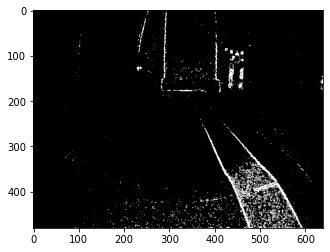

In [118]:
plt.imshow(energy, cmap="gray")

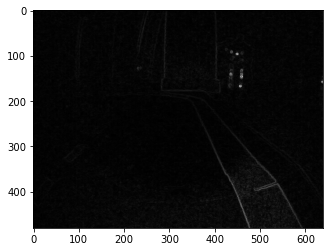

In [116]:
plt.imshow(compute_energy(img), cmap="gray")

In [95]:
new_p = Image.fromarray(compute_energy(img))
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
    
new_p.save("" + name + " energy.png")

In [96]:
new_p = Image.fromarray(energy)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
    
new_p.save(""+ name + " energy_with contrast.png")